In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Helpful functions

In [2]:
def ecdf(data):
  n_data = len(data)
  x_data = np.sort(data)
  y_data = np.linspace(1/n_data, 1, n_data)
  return x_data, y_data

In [3]:
def get_airline_name(x):
  mtch = re.search("[a-z]+([A-Z])", str(x) )
  return x[mtch.span(1)[0]:] if mtch else ""


In [4]:
def get_location(x):
  mtch = re.search("[a-z]+([A-Z])", str(x) )
  return x[:mtch.span(1)[0]] if mtch else ""


In [5]:
def add(a,b):
    return int(a)+int(b)

In [6]:
sample = 'Miami, FloridaAmerican Airlines'
get_airline_name(sample)

'American Airlines'

In [7]:
get_location(sample)

'Miami, Florida'

In [8]:
def get_casualties(x):
  nums = re.findall("([0-9]+)", x)
  return nums[0] if nums else x

In [9]:
def get_passengers(x):
  nums = re.findall("([0-9]+)", x)
  return nums[1] if len(nums) > 1 else x

In [10]:
def get_ground_casualties(x):
  nums = re.findall("([0-9]+)", x)
  return nums[2] if len(nums) > 2 else x

In [11]:
text = '22/41(0)'
get_casualties(text)

'22'

In [12]:
get_passengers(text)

'41'

In [13]:
get_ground_casualties(text)

'0'

In [14]:
def get_aircraft_type(x):
  return x.rsplit(maxsplit=1)[0]

In [15]:
smpl = "Airbus A300-600RN14056"
get_aircraft_type(smpl)
smpl.rsplit(maxsplit=1)[0]

'Airbus'

# 1. Collect information for all Airplane crashes from 2000 to 2020

You might already have received a GitHub link to a csv file called "plane_crash_all.csv"

Access the data from this csv file and present its summary report :
- Number of data points [ or rows ]
- Number of features [ or columns ]
- First 10 entries in the dataset
- Last 10 entries in the dataset
- Datatypes of each column

In [16]:
df1 = pd.read_csv('plane_crash_all.csv')

### Number of data points [ or rows ],Number of features [ or columns ]

In [17]:
#To know the shape of the data (In this data frame Rows = 746,columns = 4)
df1.shape

(746, 5)

In [18]:
#To know the columns name in the data frame
df1.columns

Index(['Unnamed: 0', 'Date', 'Location / Operator',
       'Aircraft Type / Registration', 'Fatalities'],
      dtype='object')

In [19]:
#First 10 entries in the dataset 
df1

,Unnamed: 0,Date,Location / Operator,Aircraft Type / Registration,Fatalities
0,0,05 Jan 2000,"Abuja, NigeriaSkypower Express Airways",Embraer 110P1A Bandeirante5N-AXL,1/16(1)
1,1,10 Jan 2000,"Niederhasli, SwitzerlandCrossair",Saab 340BHB-AKK,10/10(0)
2,2,13 Jan 2000,"Off Marsa el-Brega, LibyaAvisto",Shorts 360-300HB-AAM,22/41(0)
3,3,15 Jan 2000,"San Jose, Costa RicaTACA",Let 410UVP-EYS-09-C,5/20(0)
4,4,30 Jan 2000,"Off Abidjan, Ivory CoastKenya Airways",AirbusA310-3045Y-BEN,169/179(0)
...,...,...,...,...,...
741,12,27 Dec 2019,"Almaty, KazakhstanBek Air",Fokker 100UP-F100,12/98(0)
742,0,02 Jan 2020,"Geneina, SudanSudanese Air Force",Antonov An12-A?,18/18(?)
743,1,08 Jan 2020,"Near Shahriah, IranUkraine International Airlines",Boeing 737-8KV WLUR-PSR,176/176(0)
744,2,05 Feb 2020,"Istanbul, TurkeyPegasus Airlines",Boeing 737-86JTC-IZK,3/177(0)


In [20]:
# Last 10 entries in the dataset
df1.tail(10)

,Unnamed: 0,Date,Location / Operator,Aircraft Type / Registration,Fatalities
736,7,03 Jun 2019,"Near Lipo, IndiaMilitary - Indian Air Force",Antonov An-32K2752,13/13(0)
737,8,30 Jul 2019,"Rawalpindi, IndiaMilitary - Pakistan Army",Beechcraft B300 King Air766,5/5(14)
738,9,11 Sep 2019,"Toledo, OhioPrivate",Convair CV-440FN24DR,2/2(0)
739,10,04 Oct 2019,"Lviv, UkraineUkraine Air Alliance",Antonov An-12BKUR-CAH,5/8(0)
740,11,24 Nov 2019,"Goma, Democratic Republic of CongoBusy Bee Congo",Dornier 228-2019S-GNH,19/19(7)
741,12,27 Dec 2019,"Almaty, KazakhstanBek Air",Fokker 100UP-F100,12/98(0)
742,0,02 Jan 2020,"Geneina, SudanSudanese Air Force",Antonov An12-A?,18/18(?)
743,1,08 Jan 2020,"Near Shahriah, IranUkraine International Airlines",Boeing 737-8KV WLUR-PSR,176/176(0)
744,2,05 Feb 2020,"Istanbul, TurkeyPegasus Airlines",Boeing 737-86JTC-IZK,3/177(0)
745,3,29 Mar 2020,"Manila, PhilippinesLion Air Inc.",IAI 1124A Westwind IIRP-C5880,8/8(0)


In [21]:
#Datatypes of each column
df1.dtypes

Unnamed: 0                       int64
Date                            object
Location / Operator             object
Aircraft Type / Registration    object
Fatalities                      object
dtype: object

# 2. Clean the data and arrange it into a DataFrame that contains the following columns

- Day [ Day of the month ]
- Month
- Year
- Location
- Operator
- Aircraft Type
- Total Passengers
- Casualties
- Ground Casualties

Make sure each column contains data with its appropriate datatype.

To study more details about what each field in the HTML represents, you can read through this sample data at : http://www.planecrashinfo.com/2014/2014-15.htm

In [22]:
#droping single column
df1 = df1.drop(['Unnamed: 0'], axis=1)

In [23]:
#Making list of Each  coluumns
data1 = df1['Date'].tolist()
data2 = df1['Location / Operator'].tolist()
data3 = df1['Aircraft Type / Registration'].tolist()
data4 = df1['Fatalities'].tolist()

In [24]:
#Extracting the reqired data from the list and appending in to the new list
Day = []
Month = []
Year = []
for i in data1:
    splt = i.split(' ')
    day = Day.append(splt[0])
    mont = Month.append(splt[1])
    year = Year.append(splt[2])

In [25]:
#Extracting the reqired data from the list and appending in to the new list
Location = []
Operator = []
for i in data2:
    locn = get_location(i)
    locn = Location.append(locn)
    opt = get_airline_name(i)
    opt = Operator.append(opt)

In [26]:
#Extracting the reqired data from the list and appending in to new the list
Aircraft_Type = []
for i in data3:
    air_typ = get_aircraft_type(i)
    aor_typ = Aircraft_Type.append(air_typ)

In [27]:
#Extracting the reqired data from the list and appending in to new the list
Total_Passengers = []
Casualties = []
Ground_Casualties = []
for i in data4:
    pasn = get_passengers(i)
    pasn = int(pasn)
    pasn = Total_Passengers.append(pasn)
    casu = get_casualties(i)
    casu = int(casu)
    casu = Casualties.append(casu)
    gcas = get_ground_casualties(i)
    if len(gcas) < 5:
        gcas = int(gcas)
        gcas = Ground_Casualties.append(gcas)
    elif len(gcas) > 5:
        gcas = 0
        gcas = Ground_Casualties.append(gcas)

In [28]:
#Creating dataframe and aslo Arrenging the data by dictionary
df = pd.DataFrame({'Day' : Day,
                   'Month' : Month,
                   'Year' : Year,
                   'Location' : Location,
                   'Operator' : Operator,
                   'Aircraft Type' : Aircraft_Type,
                   'Total Passengers' : Total_Passengers,
                   'Casualties' : Casualties,
                   'Ground Casualties' : Ground_Casualties
                  })

In [29]:
df.head()

,Day,Month,Year,Location,Operator,Aircraft Type,Total Passengers,Casualties,Ground Casualties
0,05,Jan,2000,"Abuja, Nigeria",Skypower Express Airways,Embraer 110P1A,16,1,1
1,10,Jan,2000,"Niederhasli, Switzerland",Crossair,Saab,10,10,0
2,13,Jan,2000,"Off Marsa el-Brega, Libya",Avisto,Shorts,41,22,0
3,15,Jan,2000,"San Jose, Costa Rica",TACA,Let,20,5,0
4,30,Jan,2000,"Off Abidjan, Ivory Coast",Kenya Airways,AirbusA310-3045Y-BEN,179,169,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Day                746 non-null    object
 1   Month              746 non-null    object
 2   Year               746 non-null    object
 3   Location           746 non-null    object
 4   Operator           746 non-null    object
 5   Aircraft Type      746 non-null    object
 6   Total Passengers   746 non-null    int64 
 7   Casualties         746 non-null    int64 
 8   Ground Casualties  746 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 35.0+ KB


# 3. Display a graph for number of crashes every year

- Do you see any trend ?
- Has airplane transportation become any safer over the last 20 years ?





In [31]:
#Grouping the data by Year column
crash = df.groupby('Year').count()
crash.head()

,Day,Month,Location,Operator,Aircraft Type,Total Passengers,Casualties,Ground Casualties
Year,,,,,,,,
2000,63,63,63,63,63,63,63,63
2001,58,58,58,58,58,58,58,58
2002,55,55,55,55,55,55,55,55
2003,62,62,62,62,62,62,62,62
2004,46,46,46,46,46,46,46,46


In [32]:
sns.set()

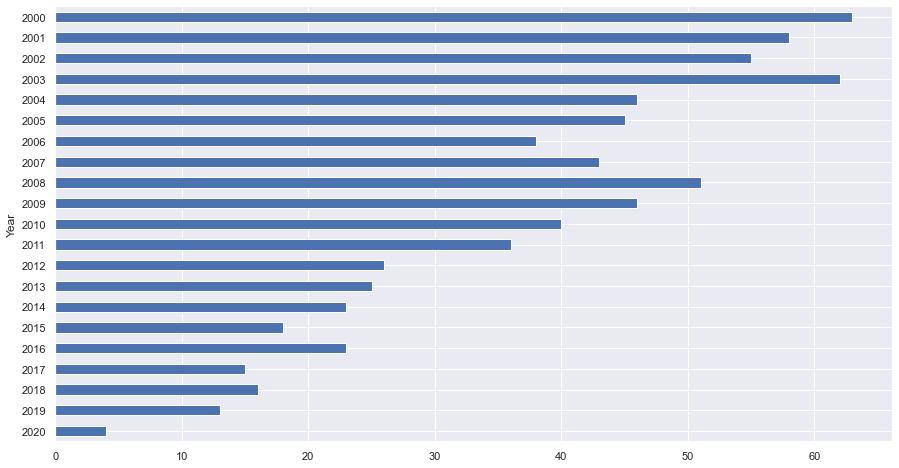

In [33]:
_ = crash.sort_index(ascending = False)['Casualties'].plot(kind = 'barh',figsize =( 15,8))

In [89]:
crash

,Day,Month,Location,Operator,Aircraft Type,Total Passengers,Casualties,Ground Casualties
Year,,,,,,,,
2000,63,63,63,63,63,63,63,63
2001,58,58,58,58,58,58,58,58
2002,55,55,55,55,55,55,55,55
2003,62,62,62,62,62,62,62,62
2004,46,46,46,46,46,46,46,46
2005,45,45,45,45,45,45,45,45
2006,38,38,38,38,38,38,38,38
2007,43,43,43,43,43,43,43,43
2008,51,51,51,51,51,51,51,51


### In the year of 2000 highest no of crashes happend.
### In the year wise graph no of crashes keep on reducing.
### in the year of 2019 and 2020 very less no of crashes happend
# The trend is:
### Every year the crashes are reducing and its never meet the highest limit at the second time.
#### In this graph we can see the clear data that is :
#### Most of the year plane crashed less then 50 times.
#### yearly wise Air Line departments are improved so much thats y plane crashes are reduced
#### last 20 years of data 2019,2020 are the safer over the 20 year.

In [90]:
crash['Aircraft Type'].sort_values(ascending = True)

Year
2020     4
2019    13
2017    15
2018    16
2015    18
2016    23
2014    23
2013    25
2012    26
2011    36
2006    38
2010    40
2007    43
2005    45
2004    46
2009    46
2008    51
2002    55
2001    58
2003    62
2000    63
Name: Aircraft Type, dtype: int64

In [92]:
crash['Aircraft Type'].sort_values(ascending = True)[:2]

Year
2020     4
2019    13
Name: Aircraft Type, dtype: int64

### In the year of 2019 and 2020 are the safest year in the entire airplane data.


# 4. Display in a graph month-wise report of deaths

- Are there any trends or patterns that you see in this data ?
- Which are the top 3 months with the highest  deaths on an average ?
- Which are the top 3 months with the least  deaths on an average?

In [46]:
month = df.groupby('Month').sum()
month.head()

,Total Passengers,Casualties,Ground Casualties
Month,,,
Apr,1830,1206,52
Aug,3462,1868,2
Dec,1640,1012,17
Feb,1693,1191,3
Jan,2411,1697,44


In [47]:
month.index

Index(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep'],
      dtype='object', name='Month')

In [48]:
month = month.reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Nov','Dec'])
month

,Total Passengers,Casualties,Ground Casualties
Month,,,
Jan,2411,1697,44
Feb,1693,1191,3
Mar,1903,1290,21
Apr,1830,1206,52
May,2671,2020,82
Jun,1818,1371,63
Jul,3045,2360,130
Aug,3462,1868,2
Sep,1576,1173,5679


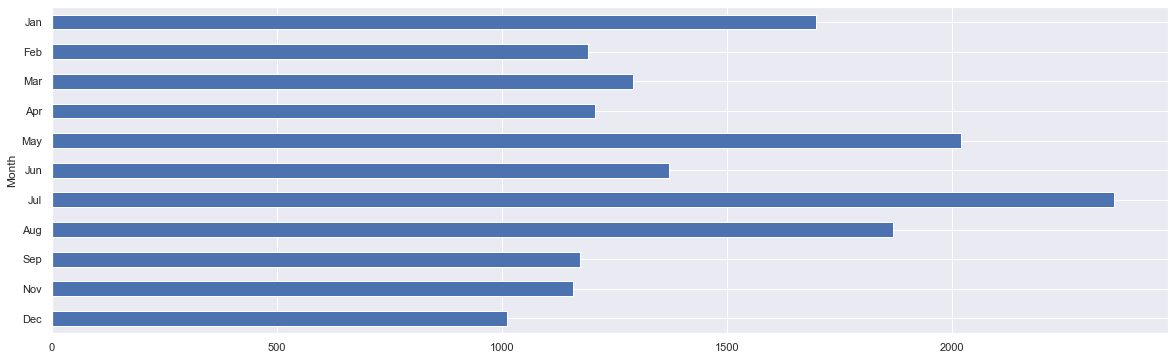

In [49]:
_ = month.iloc[::-1]['Casualties'].plot(kind = 'barh',figsize=(20, 6))

# Display in a graph month-wise report of deaths
### We can see the trend its every month more then 1000+ people die.
#### Highest deths are recorded in the month of july.
#### We can also observe the no of deths are decreasing after july.
#### for this we will get to know day by bay the airlines are giving more importance on safety.
Which are the top 3 months with the highest deaths on an average ?
Which are the top 3 months with the least deaths on an average?

In [50]:
#show the top 5 months of highest percentage of casualties
month['per_casu'] = (month['Casualties']/month['Total Passengers'])*100
month['per_casu'].sort_values(ascending = False)

Month
Jul    77.504105
May    75.627106
Jun    75.412541
Sep    74.428934
Jan    70.385732
Feb    70.348494
Mar    67.787704
Nov    66.417910
Apr    65.901639
Dec    61.707317
Aug    53.957250
Name: per_casu, dtype: float64

## Which are the top 3 months with the highest deaths on an average ?

In [51]:
month['per_casu'].sort_values(ascending = False)[:3]

Month
Jul    77.504105
May    75.627106
Jun    75.412541
Name: per_casu, dtype: float64

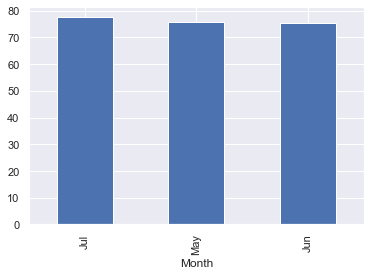

In [52]:
month['per_casu'].sort_values(ascending = False)[:3].plot(kind = 'bar')

# Top 3 months with the highest deaths including grouund casualties.

In [53]:
add = (month['Casualties']+month['Ground Casualties'])
add.sort_values(ascending = False)[:3]

Month
Sep    6852
Jul    2490
May    2102
dtype: int64

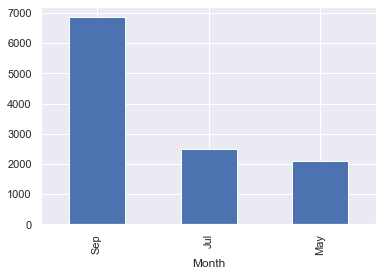

In [54]:
add.sort_values(ascending = False)[:3].plot(kind='bar')

# Top 3 months with the lowest deaths including grouund casualties.

In [55]:
add.sort_values(ascending = True)[:3]

Month
Dec    1029
Feb    1194
Nov    1218
dtype: int64

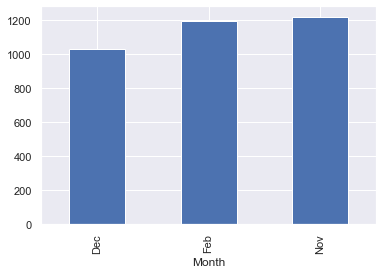

In [56]:
add.sort_values(ascending = True)[:3].plot(kind='bar')

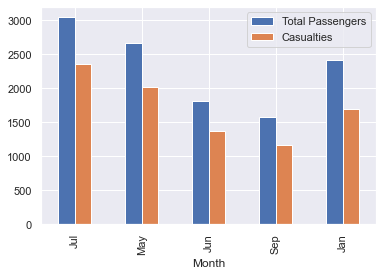

In [57]:
month.sort_values('per_casu',ascending = False)[:5][['Total Passengers','Casualties']].plot(kind = 'bar')

### we can observe the data most of the time more then 80% of the people die from the total passenger

## 5. Report the casualties among passengers and the ground for every year

- Has air travel become any safer over these years ?
- Are there any specific months where the casualties are usually less ?
- Which are the top 3 months, that reported the most number of casualties ?

In [58]:
year = df.groupby('Year').sum()
year.head()

,Total Passengers,Casualties,Ground Casualties
Year,,,
2000,2343,1430,23
2001,2040,1336,5641
2002,1715,1371,168
2003,1510,1279,24
2004,877,662,1


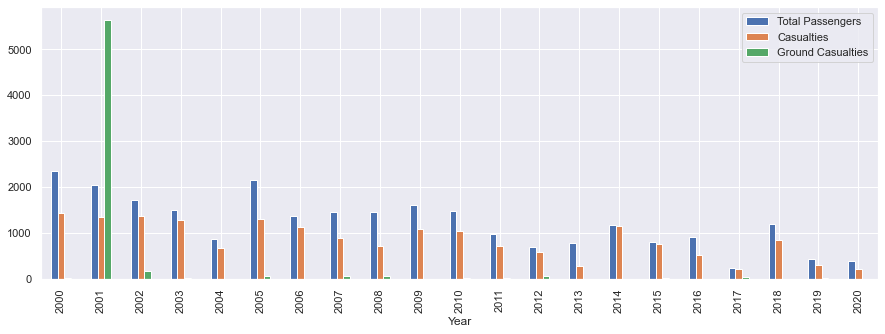

In [59]:
year[['Total Passengers','Casualties','Ground Casualties']].plot(kind = 'bar',figsize=(15, 5))

# Year wise report 
### In 2001 more then 5000+ ground level people lost thiere life bcz of Aircrraft.
### Intresting is who are all travaling in that plne, only more then 60% of people lost theire life
### After 2002 the rapid decreses in ground casulties.
### and also from last 4 years the plane crashes also reduced n only less no of people died.
### One bad thing is in 2014 almost all the people died in the entire plane.

In [60]:
both_casu = ((year['Casualties']+year['Ground Casualties'])/year['Total Passengers'])*100
both_casu.sort_values()

Year
2013     37.340153
2008     52.289815
2020     54.089710
2016     57.142857
2000     62.014511
2005     62.900976
2007     64.095563
2009     67.161410
2018     69.825436
2010     71.681416
2019     75.462963
2004     75.598632
2011     75.609756
2006     81.586608
2003     86.291391
2002     89.737609
2012     92.517986
2014     97.108844
2015     97.989950
2017    101.659751
2001    342.009804
dtype: float64

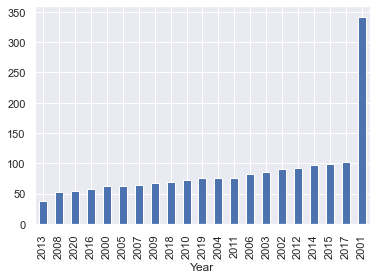

In [61]:
both_casu.sort_values().plot(kind= 'bar')

In [62]:
year['Total Casualties'] = (year['Casualties']+year['Ground Casualties'])
year

,Total Passengers,Casualties,Ground Casualties,Total Casualties
Year,,,,
2000,2343,1430,23,1453
2001,2040,1336,5641,6977
2002,1715,1371,168,1539
2003,1510,1279,24,1303
2004,877,662,1,663
2005,2151,1294,59,1353
2006,1374,1118,3,1121
2007,1465,888,51,939
2008,1463,713,52,765


In [63]:
year.sort_values('Total Casualties')

,Total Passengers,Casualties,Ground Casualties,Total Casualties
Year,,,,
2020,379,205,0,205
2017,241,210,35,245
2013,782,287,5,292
2019,432,305,21,326
2016,903,515,1,516
2012,695,587,56,643
2004,877,662,1,663
2011,984,720,24,744
2008,1463,713,52,765


## Has air travel become any safer over these years ?

In [64]:
((year['Casualties']/year['Total Passengers'])*100).sort_values()[:2]

Year
2013    36.700767
2008    48.735475
dtype: float64

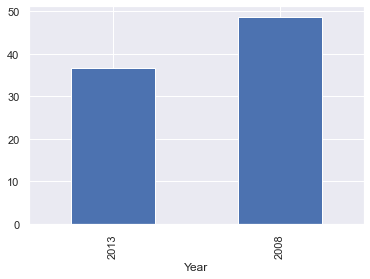

In [65]:
((year['Casualties']/year['Total Passengers'])*100).sort_values()[:2].plot(kind = 'bar')

### In he year of 2008 and 2013  are more safer years to travel in plane

## Are there any specific months where the casualties are usually less ?

In [66]:
less =  df['Casualties'] < 100
data1 = (df[less].groupby('Month').count())
data1

,Day,Year,Location,Operator,Aircraft Type,Total Passengers,Casualties,Ground Casualties
Month,,,,,,,,
Apr,46,46,46,46,46,46,46,46
Aug,76,76,76,76,76,76,76,76
Dec,48,48,48,48,48,48,48,48
Feb,46,46,46,46,46,46,46,46
Jan,66,66,66,66,66,66,66,66
Jul,63,63,63,63,63,63,63,63
Jun,53,53,53,53,53,53,53,53
Mar,59,59,59,59,59,59,59,59
May,59,59,59,59,59,59,59,59


In [67]:
less =  df['Casualties'] < 50
data2 = (df[less].groupby('Month').count())
data2

,Day,Year,Location,Operator,Aircraft Type,Total Passengers,Casualties,Ground Casualties
Month,,,,,,,,
Apr,45,45,45,45,45,45,45,45
Aug,74,74,74,74,74,74,74,74
Dec,46,46,46,46,46,46,46,46
Feb,43,43,43,43,43,43,43,43
Jan,61,61,61,61,61,61,61,61
Jul,58,58,58,58,58,58,58,58
Jun,53,53,53,53,53,53,53,53
Mar,57,57,57,57,57,57,57,57
May,56,56,56,56,56,56,56,56


In [68]:
less =  df['Casualties'] < 10
data3 = (df[less].groupby('Month').count())
data3

,Day,Year,Location,Operator,Aircraft Type,Total Passengers,Casualties,Ground Casualties
Month,,,,,,,,
Apr,24,24,24,24,24,24,24,24
Aug,40,40,40,40,40,40,40,40
Dec,31,31,31,31,31,31,31,31
Feb,27,27,27,27,27,27,27,27
Jan,35,35,35,35,35,35,35,35
Jul,32,32,32,32,32,32,32,32
Jun,34,34,34,34,34,34,34,34
Mar,37,37,37,37,37,37,37,37
May,35,35,35,35,35,35,35,35


In [69]:
less =  df['Casualties'] < 5
data4 = (df[less].groupby('Month').count())
data4

,Day,Year,Location,Operator,Aircraft Type,Total Passengers,Casualties,Ground Casualties
Month,,,,,,,,
Apr,12,12,12,12,12,12,12,12
Aug,29,29,29,29,29,29,29,29
Dec,20,20,20,20,20,20,20,20
Feb,15,15,15,15,15,15,15,15
Jan,22,22,22,22,22,22,22,22
Jul,20,20,20,20,20,20,20,20
Jun,19,19,19,19,19,19,19,19
Mar,22,22,22,22,22,22,22,22
May,20,20,20,20,20,20,20,20


In [70]:
less =  df['Casualties'] < 5
usually_less = df[less].groupby('Month').count()
usually_less['Casualties']

Month
Apr    12
Aug    29
Dec    20
Feb    15
Jan    22
Jul    20
Jun    19
Mar    22
May    20
Nov    20
Oct    28
Sep    20
Name: Casualties, dtype: int64

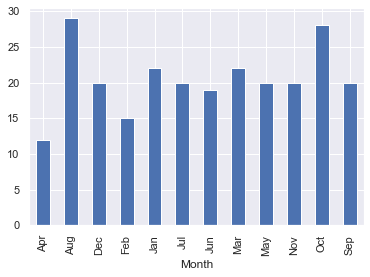

In [71]:
usually_less['Casualties'].plot(kind='bar')

### we can clearly know that the month of "April and February" are the usually less plane crashes in every year.

## Which are the top 3 months, that reported the most number of casualties ?

In [72]:
month['Casualties'].sort_values(ascending = False)

Month
Jul    2360
May    2020
Aug    1868
Jan    1697
Jun    1371
Mar    1290
Apr    1206
Feb    1191
Sep    1173
Nov    1157
Dec    1012
Name: Casualties, dtype: int64

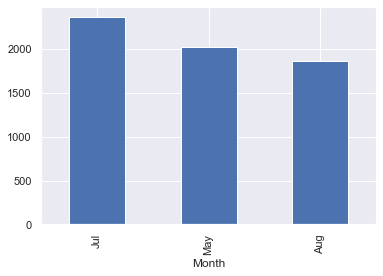

In [73]:
month['Casualties'].sort_values(ascending = False)[:3].plot(kind='bar')

### May, Jul, and Aug, In these months so many casualties are reported 

# 6. Display in a graph the number of crashes for every year that happened for Airbus

- Which were the best 3 years for Airbus ?
- Which were the worst 3 years for Airbus ?

In [74]:
'Airbus'in df['Aircraft Type'].unique() 

True

In [75]:
sorted(df['Aircraft Type'].unique()) 

['??',
 'ATR',
 'ATR-42-300YV-1449',
 'ATR-42-320N902FX',
 'ATR-42-500AP-BHO',
 'ATR-72-202TS-LBB',
 'ATR-72-212AHS-PGL',
 'ATR-72-212CU-T1549',
 'ATR-72-50RDPL-34233',
 'ATR42-320C-GWEA',
 'Aerocomp Comp Air',
 'Aerospatiale',
 'Aerospatiale AS 332L1 Super',
 'Aerospatiale AS 350B2',
 'Aerospatiale AS-350 B2',
 'Aerospatiale AS350 Eurocopter',
 'Aerospatiale AS350BA',
 'Aerospatiale BAe Concorde',
 'Aerospatiale SA365N-1 Dauphin',
 'Airbus',
 'AirbusA310-3045Y-BEN',
 'Antonov',
 'Antonov AN-12',
 'Antonov AN-140-100',
 'Antonov AN-26',
 'Antonov AN-28 PZL-Mielec M-28 Sky',
 'Antonov An-24',
 'Antonv',
 'Avro',
 'Aérospatiale/Aeritalia',
 'BAC One-Eleven',
 'BAE Avro',
 'BAe',
 'BAe 3101 Jetstream',
 'BAe Avro',
 'BAe HS-748-232 Srs',
 'BAe Jetstream',
 'Bae Jetstream',
 'Bandeirante',
 'Beech',
 'Beech 200 Super King',
 'Beech 65-A80',
 'Beech King Air 200',
 'Beechcraft',
 'Beechcraft 100 King',
 'Beechcraft A100 King',
 'Beechcraft B200 Super King',
 'Beechcraft B300 King',
 'Beechc

In [76]:
Airbus_Type = df['Aircraft Type'] == 'Airbus'
Airbus_Type = df[Airbus_Type]
Airbus_Type1 = df['Aircraft Type'] == 'AirbusA310-3045Y-BEN'
Airbus_Type1 = df[Airbus_Type1]
Airbus_Type = pd.concat([Airbus_Type1, Airbus_Type])
Airbus_Type

,Day,Month,Year,Location,Operator,Aircraft Type,Total Passengers,Casualties,Ground Casualties
4,30,Jan,2000,"Off Abidjan, Ivory Coast",Kenya Airways,AirbusA310-3045Y-BEN,179,169,0
25,25,May,2000,"Near Manila, Philippines",Philippine Air Lines,Airbus,298,1,0
46,23,Aug,2000,"Off Manama, Bahrain",Gulf Air,Airbus,143,143,0
61,20,Nov,2000,"Miami, Florida",American Airlines,Airbus,114,1,0
95,24,Aug,2001,"Lajes, Terceira, Azores",Air Transat,Airbus,304,0,0
111,12,Nov,2001,"Belle Harbor, Queens, New York",American Airlines,Airbus,260,260,5
313,02,Aug,2005,"Toronto, Canada",Air France,Airbus,309,0,0
340,03,May,2006,"Off Adler, Russia",Armavia,Airbus,113,113,0
347,09,Jul,2006,"Irkutsk, Russia",Sibir (S7),Airbus,203,125,0
391,17,Jul,2007,"Sao Paulo, Brazil",TAM (Brazil),Airbus,187,187,12


In [77]:
Airbus_Group = Airbus_Type.groupby('Year').count()
Airbus_Group

,Day,Month,Location,Operator,Aircraft Type,Total Passengers,Casualties,Ground Casualties
Year,,,,,,,,
2000,4,4,4,4,4,4,4,4
2001,2,2,2,2,2,2,2,2
2005,1,1,1,1,1,1,1,1
2006,2,2,2,2,2,2,2,2
2007,1,1,1,1,1,1,1,1
2008,3,3,3,3,3,3,3,3
2009,3,3,3,3,3,3,3,3
2010,3,3,3,3,3,3,3,3
2013,1,1,1,1,1,1,1,1


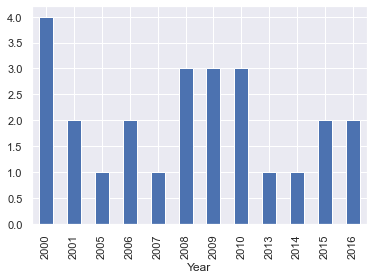

In [78]:
Airbus_Group['Casualties'].plot(kind='bar')

## Which were the best 3 years for Airbus ?

In [79]:
Airbus_Group['Casualties'].sort_values(ascending = True)[:4]

Year
2005    1
2007    1
2013    1
2014    1
Name: Casualties, dtype: int64

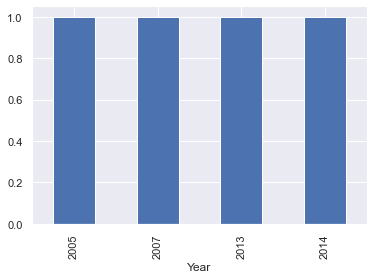

In [80]:
Airbus_Group['Casualties'].sort_values(ascending = True)[:4].plot(kind='bar')

### The year of 2005,2007,2013, and 2014 are the Best years in the airplane history 

## Which were the worst 3 years for Airbus ?

In [81]:
Airbus_Group['Casualties'].sort_values(ascending = False)[:4]

Year
2000    4
2010    3
2009    3
2008    3
Name: Casualties, dtype: int64

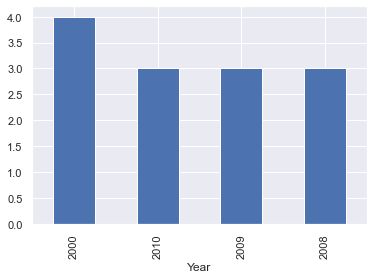

In [82]:
Airbus_Group['Casualties'].sort_values(ascending = False)[:4].plot(kind='bar')

### The year of 2000,2008,2009, and 2010 are the Worst years in the airplane history 

# 7. Cessna is one of the smallest aircrafts. Analyse the trends of casualties, both among passengers and on the ground for this aircraft

- Do you see any improvement in its safety for travel ?

In [83]:
sorted(df['Aircraft Type'].unique())

['??',
 'ATR',
 'ATR-42-300YV-1449',
 'ATR-42-320N902FX',
 'ATR-42-500AP-BHO',
 'ATR-72-202TS-LBB',
 'ATR-72-212AHS-PGL',
 'ATR-72-212CU-T1549',
 'ATR-72-50RDPL-34233',
 'ATR42-320C-GWEA',
 'Aerocomp Comp Air',
 'Aerospatiale',
 'Aerospatiale AS 332L1 Super',
 'Aerospatiale AS 350B2',
 'Aerospatiale AS-350 B2',
 'Aerospatiale AS350 Eurocopter',
 'Aerospatiale AS350BA',
 'Aerospatiale BAe Concorde',
 'Aerospatiale SA365N-1 Dauphin',
 'Airbus',
 'AirbusA310-3045Y-BEN',
 'Antonov',
 'Antonov AN-12',
 'Antonov AN-140-100',
 'Antonov AN-26',
 'Antonov AN-28 PZL-Mielec M-28 Sky',
 'Antonov An-24',
 'Antonv',
 'Avro',
 'Aérospatiale/Aeritalia',
 'BAC One-Eleven',
 'BAE Avro',
 'BAe',
 'BAe 3101 Jetstream',
 'BAe Avro',
 'BAe HS-748-232 Srs',
 'BAe Jetstream',
 'Bae Jetstream',
 'Bandeirante',
 'Beech',
 'Beech 200 Super King',
 'Beech 65-A80',
 'Beech King Air 200',
 'Beechcraft',
 'Beechcraft 100 King',
 'Beechcraft A100 King',
 'Beechcraft B200 Super King',
 'Beechcraft B300 King',
 'Beechc

In [84]:
Cessna_Type = df['Aircraft Type'] == 'Cessna'
Cessna_Type = df[Cessna_Type]
Cessna_Type1 = df['Aircraft Type'] == 'Cessna 208'
Cessna_Type1 = df[Cessna_Type1]
Cessna_Type2 = df['Aircraft Type'] == 'Cessna 208 Grand Caravan'
Cessna_Type2 = df[Cessna_Type2]
Cessna_Type3 = df['Aircraft Type'] == 'Cessna 208B Caravan I Super'
Cessna_Type3 = df[Cessna_Type3]
Cessna_Type4 = df['Aircraft Type'] == 'Cessna 208B Grand'
Cessna_Type4 = df[Cessna_Type4]
Cessna_Type5 = df['Aircraft Type'] == 'Cessna 500 Citation'
Cessna_Type5 = df[Cessna_Type5]
Cessna_Type6 = df['Aircraft Type'] == 'Cessna 550 Citation'
Cessna_Type6 = df[Cessna_Type6]
Cessna_Type7 = df['Aircraft Type'] == 'Cessna 560 Citation'
Cessna_Type7 = df[Cessna_Type7]
Cessna_Type = pd.concat([Cessna_Type, Cessna_Type1,Cessna_Type2,Cessna_Type3,Cessna_Type4,Cessna_Type5,Cessna_Type6,Cessna_Type7])
Cessna_Type

,Day,Month,Year,Location,Operator,Aircraft Type,Total Passengers,Casualties,Ground Casualties
53,16,Oct,2000,"Hillsboro, Missouri",Private,Cessna,3,3,0
62,11,Dec,2000,,,Cessna,6,6,0
184,16,Feb,2003,"Ferguson, Kentucky",Air Taxi - Great Northern Aircraft Co.,Cessna,7,3,0
193,28,May,2003,"Talkeetna, Alaska",McKinley Air Service - Air Taxi,Cessna,4,4,0
201,25,Jun,2003,"Anchor Point, Alaska",Hallo Bay Air - Air Taxi,Cessna,3,3,0
208,13,Jul,2003,"Off Treasure Cay, Bahamas",Air Sunshine,Cessna,10,2,0
108,10,Oct,2001,"Dillingham, Alaska",PenAir,Cessna 208,10,10,0
690,31,Aug,2016,"Russian Mission, Alaksa",Hageland Aviiation,Cessna 208 Grand Caravan,5,5,0
171,17,Dec,2002,"Rockford, Illinois",Planemasters,Cessna 208B Caravan I Super,1,1,0
227,29,Oct,2003,"Cody, Wyoming",FedEx,Cessna 208B Caravan I Super,1,1,0


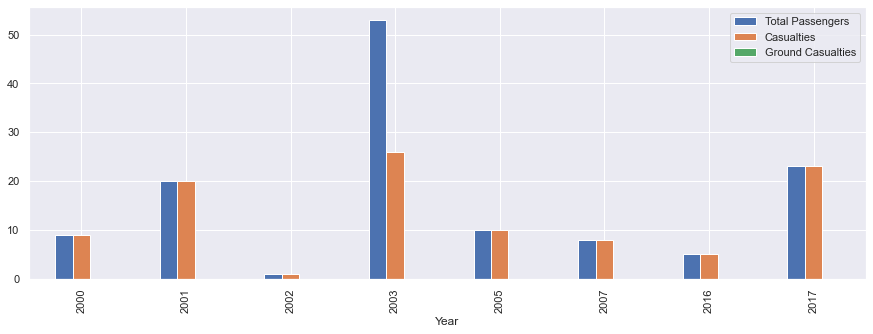

In [85]:
Cessna_Type = Cessna_Type.groupby('Year').sum()
Cessna_Type[['Total Passengers','Casualties','Ground Casualties']].plot(kind = 'bar',figsize=(15, 5))

### Here is no ground casualties are reported.
### And also one bad news is whenever this plane will crash all passengers gone.
### Only one time that is 2003 the 50% of the people got safe.
### In the year of 2001 very less crashes reported.
### After 2003 to 2016 crashes are reduced and also casualties are reduced.
### Again 2017 sudden increase in the casualties.
### One good news is after 2017 they improved their safety even more, Thats why no cases are reported, we cans say this one of the happy news.

# 8. Find out the top 5 aircrafts that have had the least number of crashes and can thus be considered relatively safe to travel in

In [86]:
group = df.groupby('Aircraft Type').count()
group

,Day,Month,Year,Location,Operator,Total Passengers,Casualties,Ground Casualties
Aircraft Type,,,,,,,,
??,1,1,1,1,1,1,1,1
ATR,7,7,7,7,7,7,7,7
ATR-42-300YV-1449,1,1,1,1,1,1,1,1
ATR-42-320N902FX,1,1,1,1,1,1,1,1
ATR-42-500AP-BHO,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
de Havilland DHC-2 Mk 1,1,1,1,1,1,1,1,1
de Havilland DHC-3,2,2,2,2,2,2,2,2
de Havilland DHC-3T Vazar,1,1,1,1,1,1,1,1


In [87]:
group['Casualties'].unique()

array([ 1,  7,  3, 24, 90,  2, 13, 68,  6,  8,  5, 10, 16, 21,  4, 12,  9,
       15, 19], dtype=int64)

In [88]:
group['Casualties'][:89]

Aircraft Type
??                        1
ATR                       7
ATR-42-300YV-1449         1
ATR-42-320N902FX          1
ATR-42-500AP-BHO          1
                         ..
Britten-Norman BN2        1
CASA                      7
CASA 212                  1
CASA 212 AviocarP-2032    1
CASA 212-DE Aviocar       1
Name: Casualties, Length: 89, dtype: int64